# **La Física del Telefonito**
## Jurianny Andica
## María José Pérez
## Alejandra Angarita


# Graficas teóricas

In [ ]:
import numpy as np
import pandas as pd

# Constantes
tension = 10  # Tensión en Newtons (se asume constante)
frecuencias = [500, 1000]  # Frecuencias de entrada en Hz
longitudes = [1, 2]  # Longitudes de las cuerdas en metros
materiales = {
    "nylon": {"mu": 0.002, "alfa": 0.1},
    "fique": {"mu": 0.005, "alfa": 0.15},
}
vasos = {
    "plástico": {"beta": 0.9},
    "papel": {"beta": 0.85},
    "lata": {"beta": 0.80},
}

# Función para calcular la frecuencia de salida teórica
def calcular_frecuencia_salida(f_entrada, material, longitud, vaso):
    mu = materiales[material]["mu"]
    alfa = materiales[material]["alfa"]
    beta = vasos[vaso]["beta"]
    v = np.sqrt(tension / mu)  # Velocidad de la onda
    atenuacion = np.exp(-alfa * longitud) * beta
    f_salida = f_entrada * atenuacion
    return f_salida

# Simulación
resultados = []
for f_entrada in frecuencias:
    for longitud in longitudes:
        for material in materiales:
            for vaso in vasos:
                f_salida = calcular_frecuencia_salida(f_entrada, material, longitud, vaso)
                resultados.append({
                    "Frecuencia de Entrada (Hz)": f_entrada,
                    "Material de la Cuerda": material,
                    "Longitud (m)": longitud,
                    "Material del Vaso": vaso,
                    "Frecuencia de Salida (Hz)": f_salida,
                })

# Convertir resultados a un DataFrame para análisis
df = pd.DataFrame(resultados)

# Mostrar resultados
print(df)

# Guardar opcionalmente en un archivo
df.to_csv("resultados_cuerda_y_vaso.csv", index=False)


    Frecuencia de Entrada (Hz) Material de la Cuerda  Longitud (m)  \
0                          500                 nylon             1   
1                          500                 nylon             1   
2                          500                 nylon             1   
3                          500                 fique             1   
4                          500                 fique             1   
5                          500                 fique             1   
6                          500                 nylon             2   
7                          500                 nylon             2   
8                          500                 nylon             2   
9                          500                 fique             2   
10                         500                 fique             2   
11                         500                 fique             2   
12                        1000                 nylon             1   
13                  

# Graficas finales


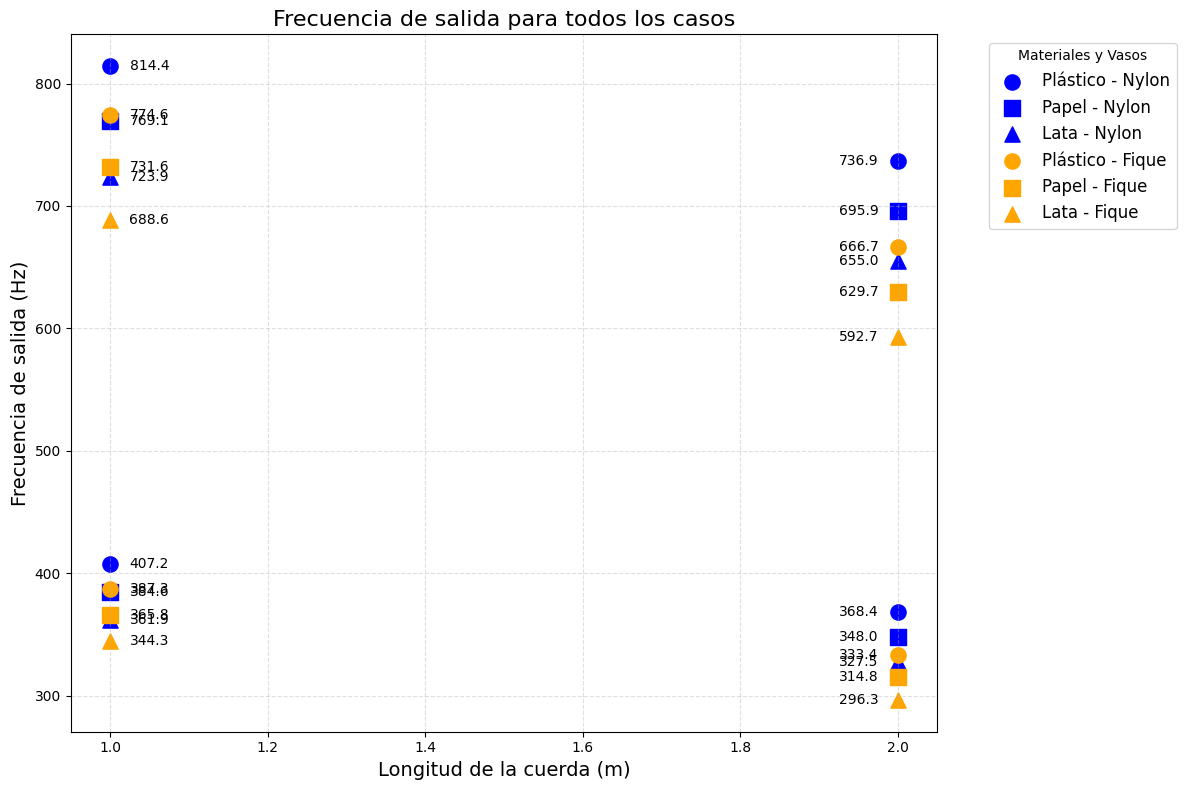

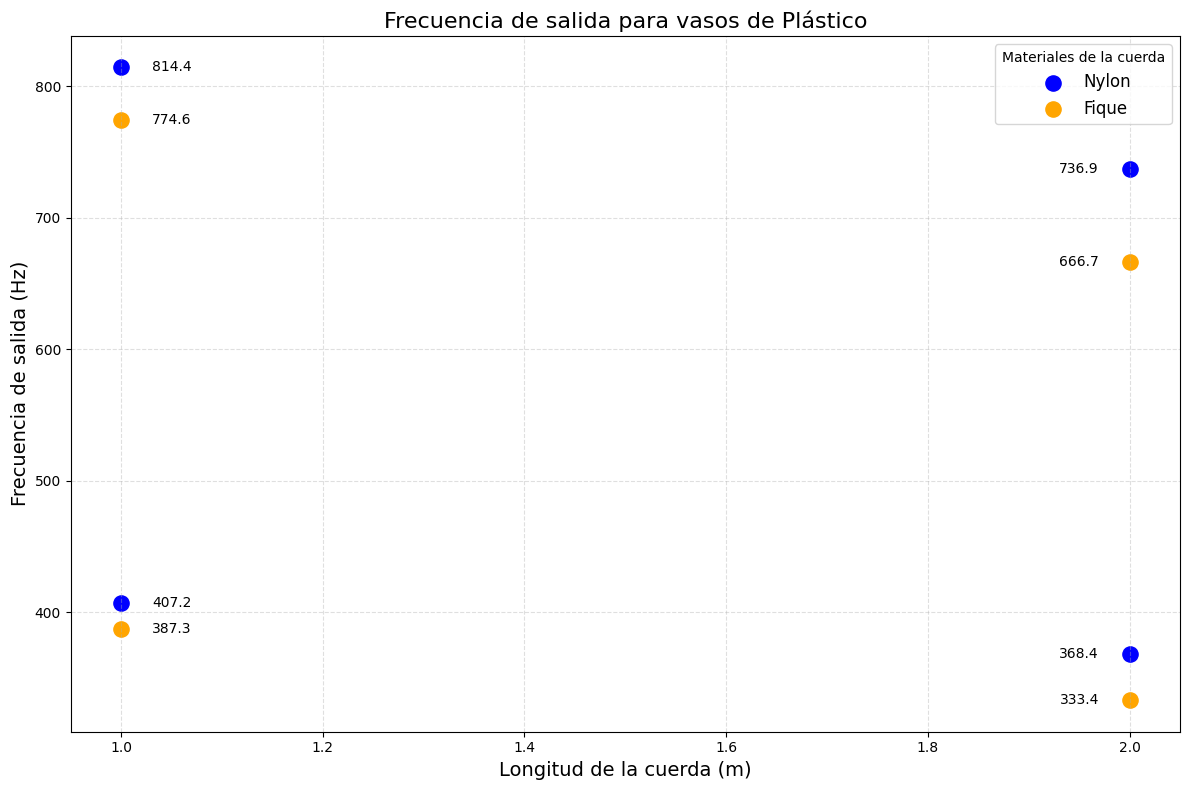

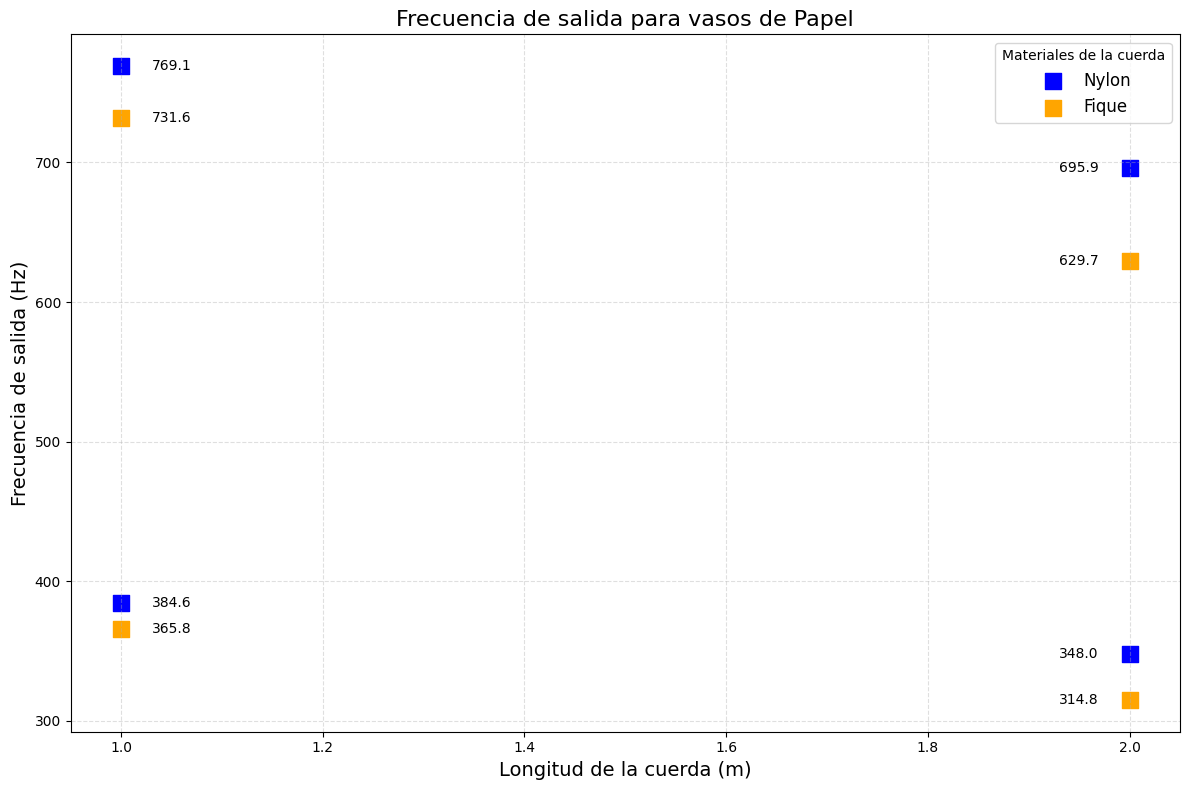

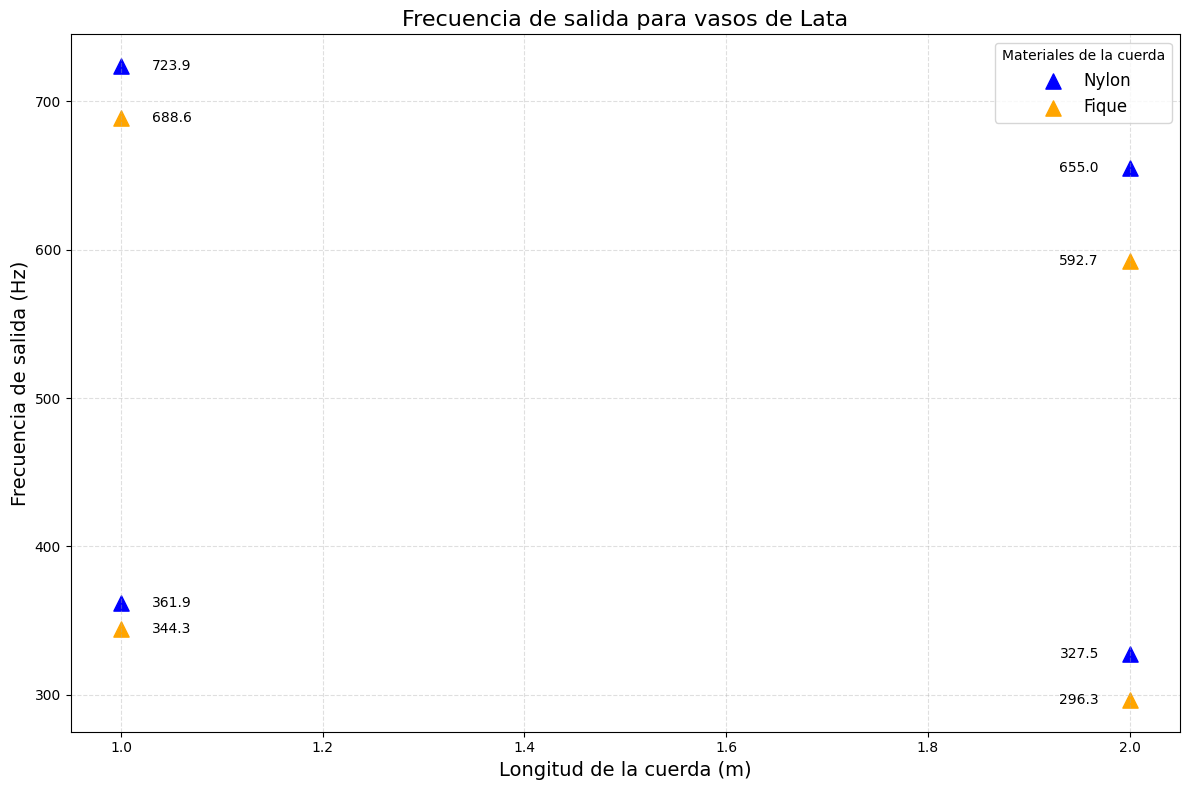

In [ ]:
import matplotlib.pyplot as plt

# Diccionario de estilos para los vasos y materiales
marcadores = {
    "plástico": "o",  # Círculo
    "papel": "s",     # Cuadrado
    "lata": "^",      # Triángulo
}

colores = {
    "nylon": "blue",   # Verde
    "fique": "orange",  # Naranja
}

# Gráfica unificada: todos los casos
plt.figure(figsize=(12, 8))
for material in materiales:
    for vaso in vasos:
        datos = df[(df["Material de la Cuerda"] == material) & (df["Material del Vaso"] == vaso)]
        longitudes = datos["Longitud (m)"]
        frecuencias = datos["Frecuencia de Salida (Hz)"]
        plt.scatter(longitudes, frecuencias,
                    color=colores[material],
                    marker=marcadores[vaso],
                    s=120, label=f"{vaso.capitalize()} - {material.capitalize()}")  # Tamaño y estilo de puntos
        for i, (x, y) in enumerate(zip(longitudes, frecuencias)):
            desplazamiento_x = 0.05 if i % 2 == 0 else -0.05  # Alternar etiquetas
            plt.text(x + desplazamiento_x, y, f"{y:.1f}", fontsize=10, ha='center', va='center')

# Configuración de diseño
plt.title("Frecuencia de salida para todos los casos", fontsize=16)
plt.xlabel("Longitud de la cuerda (m)", fontsize=14)
plt.ylabel("Frecuencia de salida (Hz)", fontsize=14)
plt.legend(title="Materiales y Vasos", fontsize=12, loc='upper left', bbox_to_anchor=(1.05, 1), framealpha=0.8)
plt.grid(alpha=0.4, linestyle='--')
plt.tight_layout()
plt.show()

# Gráficas individuales para cada vaso
for vaso in vasos:
    plt.figure(figsize=(12, 8))
    for material in materiales:
        datos = df[(df["Material de la Cuerda"] == material) & (df["Material del Vaso"] == vaso)]
        longitudes = datos["Longitud (m)"]
        frecuencias = datos["Frecuencia de Salida (Hz)"]
        plt.scatter(longitudes, frecuencias,
                    color=colores[material],
                    marker=marcadores[vaso],
                    s=120, label=f"{material.capitalize()}")  # Solo materiales
        for i, (x, y) in enumerate(zip(longitudes, frecuencias)):
            desplazamiento_x = 0.05 if i % 2 == 0 else -0.05
            plt.text(x + desplazamiento_x, y, f"{y:.1f}", fontsize=10, ha='center', va='center')

    # Configuración de diseño
    plt.title(f"Frecuencia de salida para vasos de {vaso.capitalize()}", fontsize=16)
    plt.xlabel("Longitud de la cuerda (m)", fontsize=14)
    plt.ylabel("Frecuencia de salida (Hz)", fontsize=14)
    plt.legend(title="Materiales de la cuerda", fontsize=12, loc='best', framealpha=0.8)
    plt.grid(alpha=0.4, linestyle='--')
    plt.tight_layout()
    plt.show()


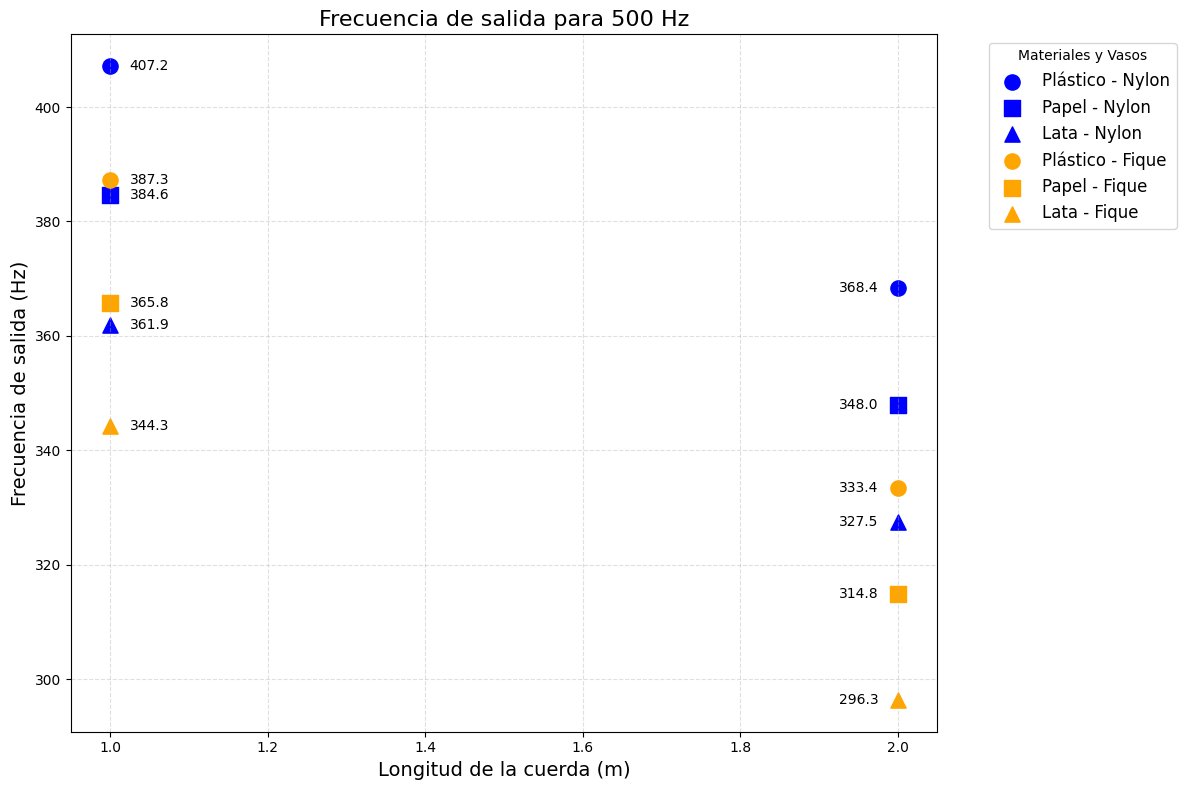

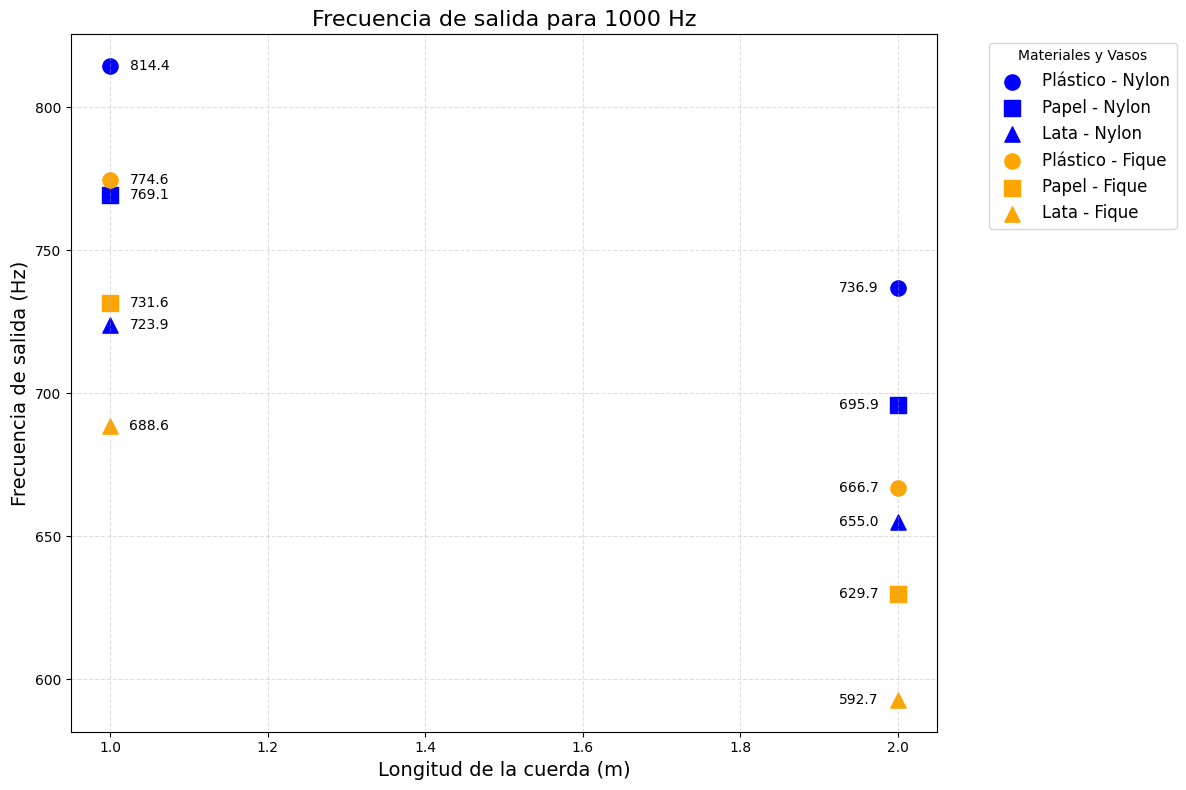

In [ ]:
import matplotlib.pyplot as plt

# Frecuencias de entrada separadas
frecuencias_entrada = [500, 1000]

# Generar gráficas separadas para 500 Hz y 1000 Hz
for f_entrada in frecuencias_entrada:
    plt.figure(figsize=(12, 8))
    for material in materiales:
        for vaso in vasos:
            datos = df[(df["Frecuencia de Entrada (Hz)"] == f_entrada) &
                       (df["Material de la Cuerda"] == material) &
                       (df["Material del Vaso"] == vaso)]
            longitudes = datos["Longitud (m)"]
            frecuencias = datos["Frecuencia de Salida (Hz)"]
            plt.scatter(longitudes, frecuencias,
                        color=colores[material],
                        marker=marcadores[vaso],
                        s=120, label=f"{vaso.capitalize()} - {material.capitalize()}")  # Tamaño y estilo de puntos
            for i, (x, y) in enumerate(zip(longitudes, frecuencias)):
                desplazamiento_x = 0.05 if i % 2 == 0 else -0.05  # Alternar etiquetas
                plt.text(x + desplazamiento_x, y, f"{y:.1f}", fontsize=10, ha='center', va='center')

    # Configuración de diseño
    plt.title(f"Frecuencia de salida para {f_entrada} Hz", fontsize=16)
    plt.xlabel("Longitud de la cuerda (m)", fontsize=14)
    plt.ylabel("Frecuencia de salida (Hz)", fontsize=14)
    plt.legend(title="Materiales y Vasos", fontsize=12, loc='upper left', bbox_to_anchor=(1.05, 1), framealpha=0.8)
    plt.grid(alpha=0.4, linestyle='--')
    plt.tight_layout()
    plt.show()


# Graficas experimentales

## 500Hz


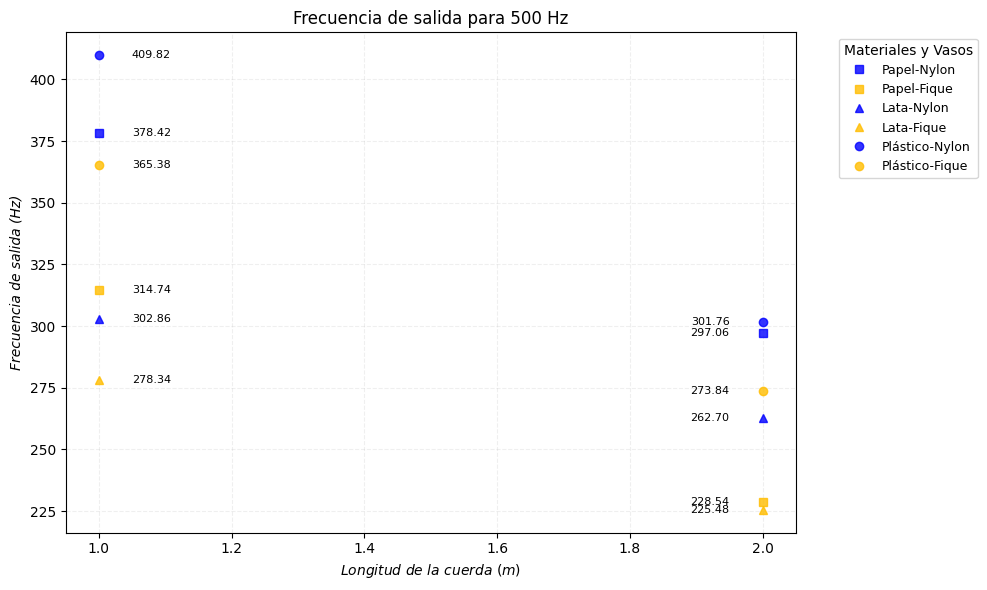

In [ ]:
import matplotlib.pyplot as plt

# Datos
xs = {
    "hilo_papel_500": [1.0, 2.0],
    "fique_papel_500": [1.0, 2.0],
    "hilo_lata_500": [1.0, 2.0],
    "fique_lata_500": [1.0, 2.0],
    "hilo_plastico_500": [1.0, 2.0],
    "fique_plastico_500": [1.0, 2.0],
}

ys = {
    "frecuencia_hilo_papel_500": [378.42, 297.06],
    "frecuencia_fique_papel_500": [314.74, 228.54],
    "frecuencia_hilo_lata_500": [302.86, 262.7],
    "frecuencia_fique_lata_500": [278.34, 225.48],
    "frecuencia_hilo_plastico_500": [409.82, 301.76],
    "frecuencia_fique_plastico_500": [365.38, 273.84],
}

# Configuración de estilos
colores = {"hilo": "#0000ff", "fique": "#ffbd00"}
marcadores = {"papel": "s", "lata": "^", "plastico": "o"}
etiquetas = {
    "hilo_papel_500": "Papel-Nylon",
    "hilo_lata_500": "Lata-Nylon",
    "hilo_plastico_500": "Plástico-Nylon",
    "fique_papel_500": "Papel-Fique",
    "fique_lata_500": "Lata-Fique",
    "fique_plastico_500": "Plástico-Fique",
}

# Inicializar figura
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Graficar puntos
for key, x_values in xs.items():
    material, objeto, _ = key.split("_")
    ax.plot(
        x_values,
        ys[f"frecuencia_{key}"],
        label=etiquetas[key],
        color=colores[material],
        marker=marcadores[objeto],
        linestyle="",  # Sin líneas que unan los puntos
        alpha=0.8,
    )
    # Añadir textos alternando derecha e izquierda
    for i, (x, y) in enumerate(zip(x_values, ys[f"frecuencia_{key}"])):
        desplazamiento_x = 0.05 if i % 2 == 0 else -0.05  # Alternar derecha/izquierda
        ha = "left" if i % 2 == 0 else "right"
        ax.text(x + desplazamiento_x, y, f"{y:.2f}", fontsize=8, ha=ha, va="center")

# Configuración de la gráfica
ax.set_title("Frecuencia de salida para 500 Hz", fontsize=12)
ax.set_xlabel("Longitud de la cuerda $(m)$", fontsize=10, style="oblique")
ax.set_ylabel("Frecuencia de salida (Hz)", fontsize=10, style="oblique")
ax.legend(title="Materiales y Vasos", fontsize=9, loc="upper left", bbox_to_anchor=(1.05, 1), framealpha=0.8)
ax.grid(alpha=0.2, linestyle="--")
plt.tight_layout()

# Mostrar gráfica
plt.show()


## 1000Hz

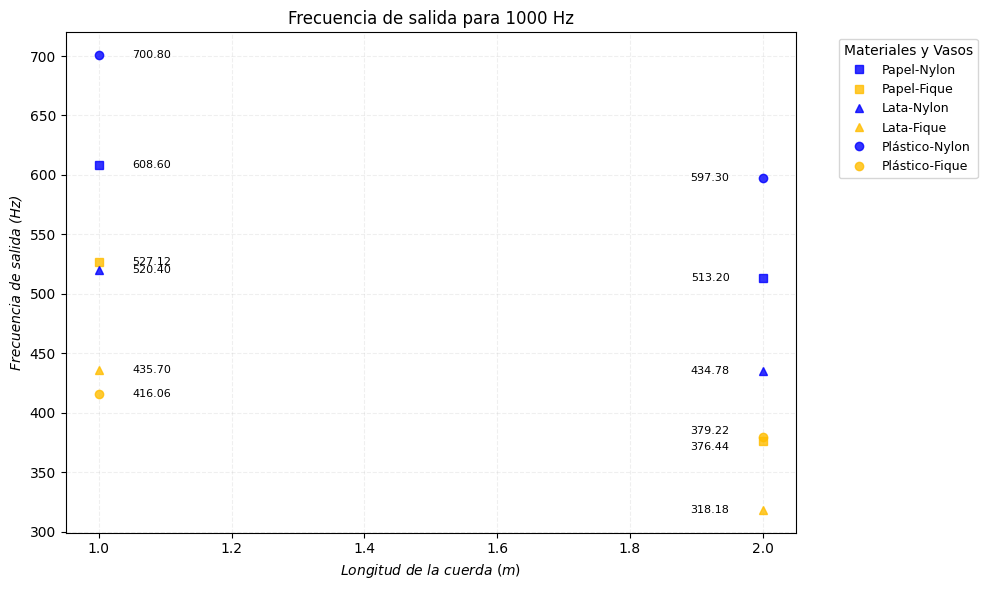

In [ ]:
import matplotlib.pyplot as plt

# Datos
xs = {
    'hilo_papel_1000': [1.0, 2.0], 'fique_papel_1000': [1.0, 2.0],
    'hilo_lata_1000': [1.0, 2.0], 'fique_lata_1000': [1.0, 2.0],
    'hilo_plastico_1000': [1.0, 2.0], 'fique_plastico_1000': [1.0, 2.0]
}

ys = {
    'frecuencia_hilo_papel_1000': [608.6, 513.2], 'frecuencia_fique_papel_1000': [527.12, 376.44],
    'frecuencia_hilo_lata_1000': [520.4, 434.78], 'frecuencia_fique_lata_1000': [435.7, 318.18],
    'frecuencia_hilo_plastico_1000': [700.8, 597.3], 'frecuencia_fique_plastico_1000': [416.06, 379.22]
}

# Configuración de estilos
colores = {"hilo": "#0000ff", "fique": "#ffbd00"}  # Azul y amarillo
marcadores = {"papel": "s", "lata": "^", "plastico": "o"}
etiquetas = {
    "hilo_papel_1000": "Papel-Nylon", "fique_papel_1000": "Papel-Fique",
    "hilo_lata_1000": "Lata-Nylon", "fique_lata_1000": "Lata-Fique",
    "hilo_plastico_1000": "Plástico-Nylon", "fique_plastico_1000": "Plástico-Fique"
}

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar los puntos y añadir etiquetas de texto
for key, x_values in xs.items():
    material, objeto, _ = key.split("_")
    color = colores[material]
    marcador = marcadores[objeto]
    etiqueta = etiquetas[key]

    # Graficar puntos
    ax.plot(x_values, ys[f"frecuencia_{key}"], color=color, label=etiqueta, marker=marcador, linestyle="", alpha=0.8)

    # Añadir textos alternando derecha e izquierda
    for i, (x, y) in enumerate(zip(x_values, ys[f"frecuencia_{key}"])):
        desplazamiento_x = 0.05 if i % 2 == 0 else -0.05  # Alternar entre derecha e izquierda
        ha = "left" if i % 2 == 0 else "right"

        # Ajustar los valores de 379.22 y 376.44
        if y in [379.22, 376.44]:
            desplazamiento_y = 5 if y == 379.22 else -5
        else:
            desplazamiento_y = 0

        ax.text(x + desplazamiento_x, y + desplazamiento_y, f"{y:.2f}", fontsize=8, ha=ha, va="center")

# Configuración del gráfico
ax.set_title("Frecuencia de salida para 1000 Hz", fontsize=12)
ax.set_xlabel("Longitud de la cuerda $(m)$", fontsize=10, style="oblique")
ax.set_ylabel("Frecuencia de salida (Hz)", fontsize=10, style="oblique")
ax.legend(title="Materiales y Vasos", fontsize=9, loc="upper left", bbox_to_anchor=(1.05, 1), framealpha=0.8)
ax.grid(alpha=0.2, linestyle="--")
plt.tight_layout()

# Mostrar gráfico
plt.show()


# Comparacion Resultados

## 500HZ

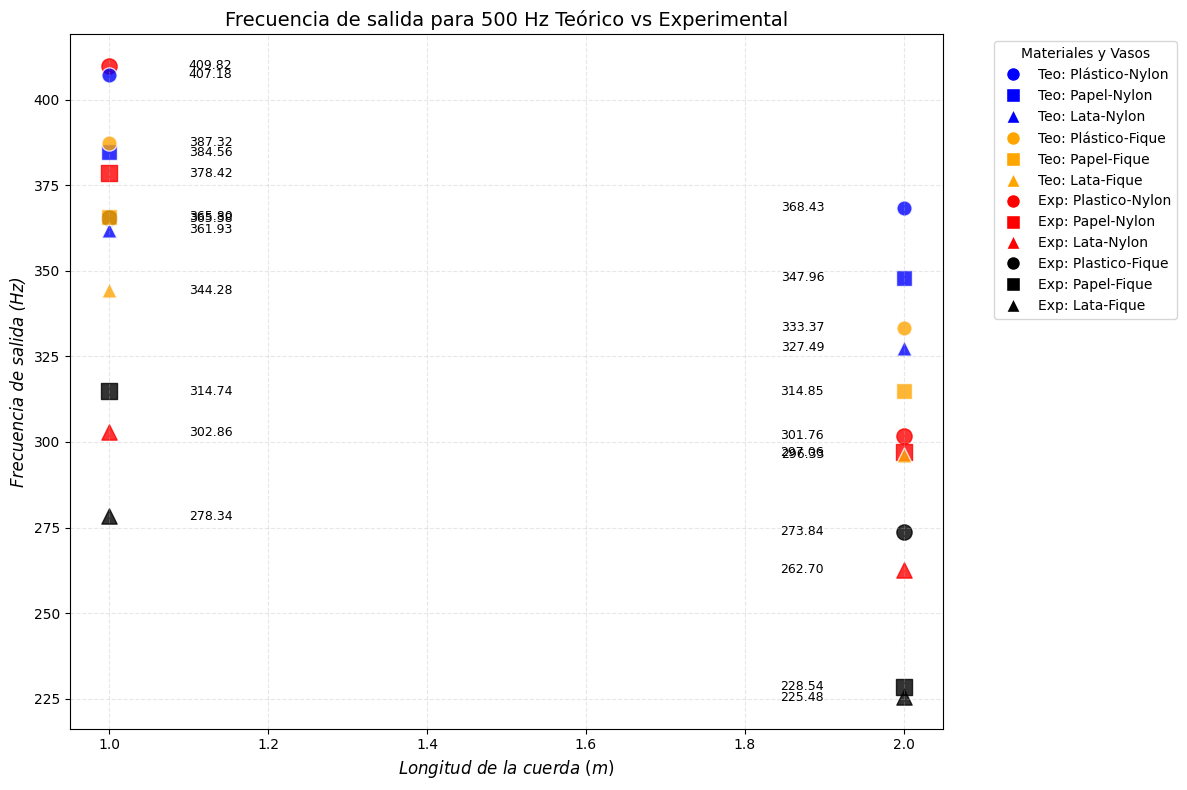

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Constantes
tension = 10  # Tensión en Newtons
frecuencia = 500  # Frecuencia de entrada en Hz
longitudes = [1, 2]  # Longitudes de las cuerdas en metros
materiales = {
    "nylon": {"mu": 0.002, "alfa": 0.1},
    "fique": {"mu": 0.005, "alfa": 0.15},
}
vasos = {
    "plástico": {"beta": 0.9},
    "papel": {"beta": 0.85},
    "lata": {"beta": 0.80},
}

# Función para calcular la frecuencia de salida teórica
def calcular_frecuencia_salida(f_entrada, material, longitud, vaso):
    mu = materiales[material]["mu"]
    alfa = materiales[material]["alfa"]
    beta = vasos[vaso]["beta"]
    v = np.sqrt(tension / mu)  # Velocidad de la onda
    atenuacion = np.exp(-alfa * longitud) * beta
    f_salida = f_entrada * atenuacion
    return f_salida

# Cálculo de frecuencias teóricas
teoricos = []
for longitud in longitudes:
    for material in materiales:
        for vaso in vasos:
            f_salida = calcular_frecuencia_salida(frecuencia, material, longitud, vaso)
            teoricos.append({
                "Material": material,
                "Vaso": vaso,
                "Longitud (m)": longitud,
                "Frecuencia Teórica (Hz)": f_salida,
            })

# Datos experimentales
xs_experimentales = {
    "nylon_papel_500": [1.0, 2.0],
    "fique_papel_500": [1.0, 2.0],
    "nylon_lata_500": [1.0, 2.0],
    "fique_lata_500": [1.0, 2.0],
    "nylon_plastico_500": [1.0, 2.0],
    "fique_plastico_500": [1.0, 2.0],
}

ys_experimentales = {
    "frecuencia_nylon_papel_500": [378.42, 297.06],
    "frecuencia_fique_papel_500": [314.74, 228.54],
    "frecuencia_nylon_lata_500": [302.86, 262.7],
    "frecuencia_fique_lata_500": [278.34, 225.48],
    "frecuencia_nylon_plastico_500": [409.82, 301.76],
    "frecuencia_fique_plastico_500": [365.38, 273.84],
}

# Configuración de colores y marcadores
colores_exp = {"nylon": "#ff0000", "fique": "#000000"}  # Rojo y negro para experimentales
colores_teo = {"nylon": "#0000FF", "fique": "#FFA500"}  # Azul para nylon y amarillo para fique
marcadores = {"papel": "s", "lata": "^", "plastico": "o"}

# Orden específico para los datos experimentales
orden_experimental = [
    "nylon_plastico_500",
    "nylon_papel_500",
    "nylon_lata_500",
    "fique_plastico_500",
    "fique_papel_500",
    "fique_lata_500",
]

# Inicializar figura
plt.figure(figsize=(12, 8))
ax = plt.gca()

# Listas de handles para leyenda
handles_teoricos = []
handles_experimentales = []

# Graficar datos experimentales en el orden específico
for key in orden_experimental:
    material, vaso, _ = key.split("_")
    x_values = xs_experimentales[key]
    y_values = ys_experimentales[f"frecuencia_{key}"]

    etiqueta = f"Exp: {vaso.capitalize()}-{material.capitalize()}"

    # Agregar handle a la leyenda si aún no existe
    if etiqueta not in [handle.get_label() for handle in handles_experimentales]:
        handles_experimentales.append(
            Line2D([0], [0], marker=marcadores[vaso], color='w', markerfacecolor=colores_exp[material],
                   markersize=10, label=etiqueta)
        )

    # Graficar los puntos experimentales
    for i, (x, y) in enumerate(zip(x_values, y_values)):
        if x == 1.0:
            desplazamiento_x = 0.1  # Para 1 m, mover a la derecha
            ha = "left"  # Alinear a la izquierda
        else:
            desplazamiento_x = -0.1  # Para 2 m, mover a la izquierda
            ha = "right"  # Alinear a la derecha

        ax.scatter(
            [x],
            [y],
            color=colores_exp[material],
            marker=marcadores[vaso],
            s=120,
            alpha=0.8,
        )
        ax.text(x + desplazamiento_x, y, f"{y:.2f}", fontsize=9, ha=ha, va="center")

# Agrupar y graficar los datos teóricos
for data in teoricos:
    material = data["Material"]
    vaso = data["Vaso"]
    longitud = data["Longitud (m)"]
    frecuencia_teorica = data["Frecuencia Teórica (Hz)"]

    etiqueta = f"Teo: {vaso.capitalize()}-{material.capitalize()}"

    if etiqueta not in [handle.get_label() for handle in handles_teoricos]:
        handles_teoricos.append(
            Line2D([0], [0], marker=marcadores[vaso.lower().replace('á', 'a')], color='w', markerfacecolor=colores_teo[material],
                   markersize=10, label=etiqueta)
        )

    if longitud == 1.0:
        desplazamiento_x = 0.1  # Para 1 m, mover a la derecha
        ha = "left"  # Alinear a la izquierda
    else:
        desplazamiento_x = -0.1  # Para 2 m, mover a la izquierda
        ha = "right"  # Alinear a la derecha

    ax.scatter(
        [longitud],
        [frecuencia_teorica],
        color=colores_teo[material],
        marker=marcadores[vaso.lower().replace('á', 'a')],
        s=120,
        alpha=0.8,
        edgecolor="white",
    )
    ax.text(longitud + desplazamiento_x, frecuencia_teorica, f"{frecuencia_teorica:.2f}", fontsize=9, ha=ha, va="center")

# Agregar leyenda con los datos teóricos primero y luego los experimentales
handles = handles_teoricos + handles_experimentales
ax.legend(
    handles=handles,
    title="Materiales y Vasos",
    fontsize=10,
    loc="upper left",
    bbox_to_anchor=(1.05, 1),
    framealpha=0.8
)

# Configuración de la gráfica
ax.set_title("Frecuencia de salida para 500 Hz Teórico vs Experimental", fontsize=14)
ax.set_xlabel("Longitud de la cuerda $(m)$", fontsize=12, style="oblique")
ax.set_ylabel("Frecuencia de salida (Hz)", fontsize=12, style="oblique")
ax.grid(alpha=0.3, linestyle="--")
plt.tight_layout()

# Mostrar gráfica
plt.show()


## 1000Hz


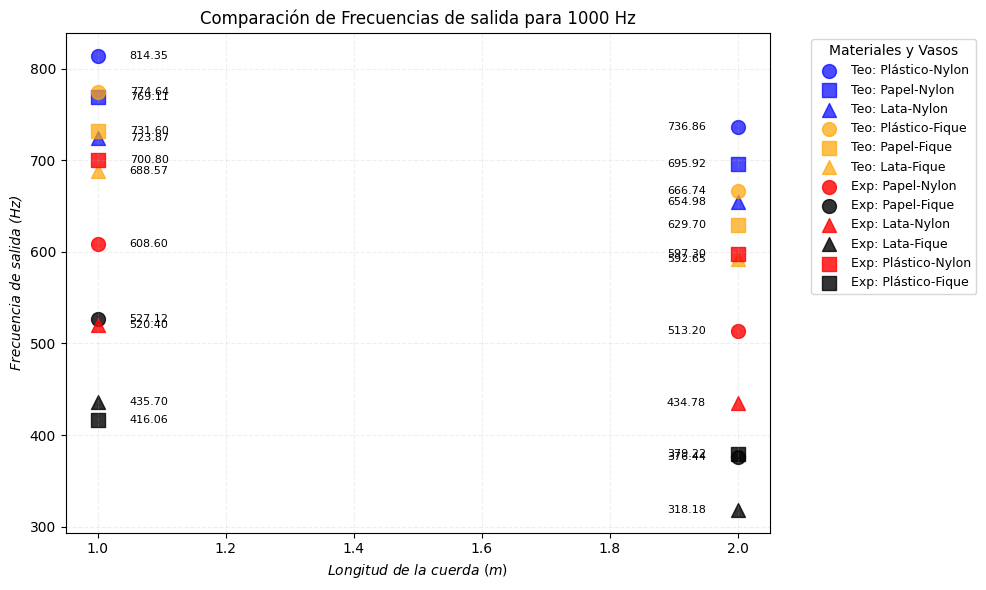

In [ ]:
# Crear figura y ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Registro de etiquetas únicas para la leyenda
etiquetas_usadas = set()

# Graficar los puntos teóricos
for _, row in df_teoricos.iterrows():
    vaso = row['Material del Vaso']
    material = row['Material de la Cuerda']

    color_teorico = colores_teoricos[material]
    if vaso == "plástico":
        marcador_teorico = "o"
        etiqueta_teorica = f"Teo: Plástico-{material.capitalize()}"
    elif vaso == "papel":
        marcador_teorico = "s"
        etiqueta_teorica = f"Teo: Papel-{material.capitalize()}"
    else:
        marcador_teorico = "^"
        etiqueta_teorica = f"Teo: Lata-{material.capitalize()}"

    # Graficar puntos teóricos
    ax.scatter(row['Longitud (m)'], row['Frecuencia de Salida (Hz)'],
               color=color_teorico, marker=marcador_teorico, s=100, alpha=0.7,
               label=etiqueta_teorica if etiqueta_teorica not in etiquetas_usadas else "")
    etiquetas_usadas.add(etiqueta_teorica)

    # Añadir etiquetas a los puntos teóricos
    if row['Longitud (m)'] == 1.0:
        desplazamiento_x = 0.05  # Etiquetas a la derecha
        ha = "left"
    elif row['Longitud (m)'] == 2.0:
        desplazamiento_x = -0.05  # Etiquetas a la izquierda
        ha = "right"
    ax.text(row['Longitud (m)'] + desplazamiento_x, row['Frecuencia de Salida (Hz)'],
            f"{row['Frecuencia de Salida (Hz)']:.2f}", fontsize=8, ha=ha, va="center")

# Graficar los puntos experimentales
for key, x_values in xs.items():
    material, vaso, _ = key.split("_")
    color = colores_experimentales[material]
    marcador = marcadores_experimentales[vaso]
    etiqueta = f"Exp: {etiquetas[key]}"

    # Graficar puntos experimentales
    ax.scatter(x_values, ys[f"frecuencia_{key}"], color=color,
               label=etiqueta if etiqueta not in etiquetas_usadas else "",
               marker=marcador, s=100, alpha=0.8)
    etiquetas_usadas.add(etiqueta)

    # Añadir etiquetas de texto en los puntos experimentales
    for i, (x, y) in enumerate(zip(x_values, ys[f"frecuencia_{key}"])):
        if x == 1.0:
            desplazamiento_x = 0.05  # Etiquetas a la derecha
            ha = "left"
        elif x == 2.0:
            desplazamiento_x = -0.05  # Etiquetas a la izquierda
            ha = "right"
        ax.text(x + desplazamiento_x, y, f"{y:.2f}", fontsize=8, ha=ha, va="center")

# Configuración del gráfico
ax.set_title("Comparación de Frecuencias de salida para 1000 Hz", fontsize=12)
ax.set_xlabel("Longitud de la cuerda $(m)$", fontsize=10, style="oblique")
ax.set_ylabel("Frecuencia de salida (Hz)", fontsize=10, style="oblique")
ax.legend(title="Materiales y Vasos", fontsize=9, loc="upper left", bbox_to_anchor=(1.05, 1), framealpha=0.8)
ax.grid(alpha=0.2, linestyle="--")
plt.tight_layout()

# Mostrar gráfico
plt.show()
